In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

# Any results you write to the current directory are saved as output.

# Importing libraries

In [2]:
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import MultinomialNB

In [4]:
data = pd.read_csv('bbc-text.csv')

# studying data

In [51]:
data.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [6]:
data['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [7]:
type(data['category'])

pandas.core.series.Series

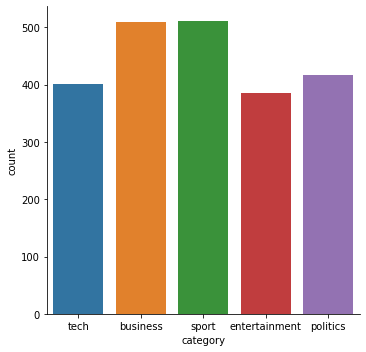

In [8]:
sns.catplot(x = 'category', kind='count',data=data)

In [9]:
data.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,virus poses as christmas e-mail security firms...
freq,511,2


In [10]:
data.index

RangeIndex(start=0, stop=2225, step=1)

# Preprocessing data

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daisycharlie\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
import pickle

In [13]:
#loading stop words list
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
print(stop_words)

{'aren', 'who', 'me', 'below', 'she', 'on', 'can', 'been', 'as', 'an', "shan't", 'now', 'or', 'until', 'mustn', 'no', "mightn't", 'during', 'again', 'then', 'over', 'that', 'itself', 'd', 'which', 'to', 'other', 'up', 'and', 'was', 'when', 'yourself', 'here', 'it', 'her', 'ours', 'them', 'these', "needn't", 'this', 'have', 't', 'o', 'those', 'most', 'you', "it's", 'before', 'my', 'only', 'hadn', 'too', 'own', 'each', "aren't", 'for', "hadn't", 'ain', "hasn't", 'doing', "haven't", 'shouldn', "you'd", 'why', 'such', "isn't", 'so', 'against', 'is', 'ma', 'between', "you're", 'has', 'after', "shouldn't", 'herself', 'isn', 'where', 'll', 'theirs', 'if', "weren't", 'having', 'were', 'about', 'any', 'weren', 'are', 'needn', "should've", 'y', "you'll", 'yourselves', "didn't", "won't", 'himself', "don't", "couldn't", 'we', 'themselves', 'its', 's', 'his', 'under', 'should', 'does', "wasn't", 'more', 'i', 'am', 'both', 'be', 'haven', 'how', "you've", 'our', 'yours', 'couldn', 'being', 'myself', 

In [15]:
pickle.dump(stop_words, open('stop_words.pkl','wb'))
pickle.dump(stemmer, open('stemmer.pkl','wb'))
pickle.dump(lemmatizer, open('lemmatizer.pkl','wb'))

In [16]:
def preprocess(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z ]','',text)
    # removing stop words
    wordsList = text.split()
    newWordsList = []
    for word in wordsList:
        if word  not in stop_words: # remove stop words
            word = stemmer.stem(word) #using porter stemmer
            word = lemmatizer.lemmatize(word)
            newWordsList.append(word)
            
    return " ".join(newWordsList)

In [17]:
sampleText = data['text'][35]
sampleText

'sayeed to stand down as tory mp tory mp jonathan sayeed is to stand down on the grounds of ill health.  the decision comes after mr sayeed survived an attempt to de-select him in a row over allegations he had profited from private tours of parliament. the mid-bedfordshire mp had denied a claim that he was paid for guiding visitors around the palace of westminster. conservative leader michael howard has now accepted the mp s resignation  it has been announced.  mr sayeed was suspended from parliament for two weeks last month after the commons standards and privileges committee said his conduct had fallen  well below the standards expected . the conservative party had already been withdrawn the whip for a month. but his constituency association voted against a move to deselect him  with mr sayeed winning 173 of the 299 votes. after the vote  mr sayeed said only a fifth of association members had voted against him and he intended to get on with winning the election. but the vote prompted

In [18]:
smplePre = preprocess(sampleText)
smplePre

'saye stand torus mp torus mp jonathan saye stand ground ill health decis come mr saye surviv attempt deselect row alleg profit privat tour parliament midbedfordshir mp deni claim paid guid visitor around palac westminst conserv leader michael howard accept mp resign announc mr saye suspend parliament two week last month common standard privileg committe said conduct fallen well standard expect conserv parti alreadi withdrawn whip month constitu associ vote move deselect mr saye win vote vote mr saye said fifth associ member vote intend get win elect vote prompt constitu associ presid sir stanley odel resign protest standard privileg committe inquiri launch sunday time alleg english manner limit charg client access westminst mr saye mr saye deni claim say suspens unjust wrong made unreserv apolog mp common chamber insist committe report contain error fact mr saye mp midbedfordshir sinc repres bristol east'

In [19]:
x = data['text'].apply(lambda x:preprocess(x))

In [20]:
x

0       tv futur hand viewer home theatr system plasma...
1       worldcom bos left book alon former worldcom bo...
2       tiger wari farrel gambl leicest say rush make ...
3       yead face newcastl fa cup premiership side new...
4       ocean twelv raid box offic ocean twelv crime c...
                              ...                        
2220    car pull u retail figur u retail sale fell jan...
2221    kilroy unveil immigr polici exchatshow host ro...
2222    rem announc new glasgow concert u band rem ann...
2223    polit squabbl snowbal becom commonplac argu bl...
2224    souness delight euro progress bos graem sounes...
Name: text, Length: 2225, dtype: object

In [33]:
tv = TfidfVectorizer()
tvEnc = tv.fit(x)
pickle.dump(tvEnc, open('tv.pkl','wb'))
x_tf= tv.transform(x)

In [34]:
le = LabelEncoder()
leEnc = tv.fit(x)
pickle.dump(leEnc, open('le.pkl','wb'))
y = le.fit_transform(data['category'])

In [23]:
#new_y = y.reshape(-1,1)
#pd.DataFrame(new_y)[0].value_counts()

In [24]:
#enc = OneHotEncoder(categories='auto')
#y = enc.fit_transform(new_y).toarray()


In [25]:
pd.DataFrame(y)

,0
0,4
1,0
2,3
3,3
4,1
...,...
2220,0
2221,2
2222,1
2223,2


# Splitting the data

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x_tf,y,test_size=0.2)

In [27]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
model.score(x_test,y_test)

0.9640449438202248

# Testing

In [52]:
sample_data = "howard hits back at mongrel jibe michael howar"
preData = preprocess(sample_data)
finalSample = tv.transform([preData])

In [53]:
result =model.predict(finalSample)
resClass = le.inverse_transform(result)

In [54]:
resClass

array(['politics'], dtype=object)

In [55]:
result

array([2])

In [ ]:
#3=>sport,4=>tech,0=>business,1=>entertainment,2=>politics